<a href="https://colab.research.google.com/github/ferpatugo/Estatistica-Python/blob/main/Aula_pr%C3%A1tica_02_Medidas_de_tend%C3%AAncia_central.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importanto biblibotecas

In [13]:
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis, mode
import matplotlib.pyplot as plt


# Carregando o dado das empresas

In [4]:
a = np.array([2000, 3000, 4000, 9000])
b = np.array([2000, 3000, 3000, 3000, 3000, 3000, 4000, 7000, 9000])
c = np.array([2000, 3000, 4000, 6000, 7000, 7000, 8000, 9000])

# Criando função para calcular a Moda

In [9]:
def calculate_mode(array):
    modes = mode(array)
    # Verifica se count é array ou escalar para evitar erro de indexação
    count = modes.count if np.isscalar(modes.count) else modes.count[0]
    if count > 1:
        return modes.mode if np.isscalar(modes.mode) else modes.mode[0]
    else:
        counts = np.bincount(array)
        if max(counts) == 1:
            return None
        else:
            return modes.mode if np.isscalar(modes.mode) else modes.mode[0]



# Criando função para calcular as métricas estatísticas

In [6]:
def summary_stats(array):
    return {
        'min': np.min(array),
        '1st_quartile': np.percentile(array, 25),
        'median': np.median(array),
        'mean': np.mean(array),
        '3rd_quartile': np.percentile(array, 75),
        'max': np.max(array)
    }

In [7]:
def describe_sample(name, array):
    result = {
        'sample': name,
        'mode': calculate_mode(array),
        'median': np.median(array),
        'mean': np.mean(array),
        'skewness': skew(array),
        'kurtosis': kurtosis(array, fisher=True),  # Curtose excessiva
        **summary_stats(array)
    }
    return result


In [11]:
stats_a = describe_sample('Empresa A', a)
stats_b = describe_sample('Empresa B', b)
stats_c = describe_sample('Empresa C', c)
stats_a
stats_b
stats_c


{'sample': 'Empresa C',
 'mode': np.int64(7000),
 'median': np.float64(6500.0),
 'mean': np.float64(5750.0),
 'skewness': np.float64(-0.2883613024736138),
 'kurtosis': np.float64(-1.281807372175981),
 'min': np.int64(2000),
 '1st_quartile': np.float64(3750.0),
 '3rd_quartile': np.float64(7250.0),
 'max': np.int64(9000)}

In [12]:
df_stats = pd.DataFrame([stats_a, stats_b, stats_c])
df_stats

,sample,mode,median,mean,skewness,kurtosis,min,1st_quartile,3rd_quartile,max
0,Empresa A,NaN,3500.0,4500.000000,0.922073,-0.839477,2000,2750.0,5250.0,9000
1,Empresa B,3000.0,3000.0,4111.111111,1.331804,0.270329,2000,3000.0,4000.0,9000
2,Empresa C,7000.0,6500.0,5750.000000,-0.288361,-1.281807,2000,3750.0,7250.0,9000


# Histograma Empresa A


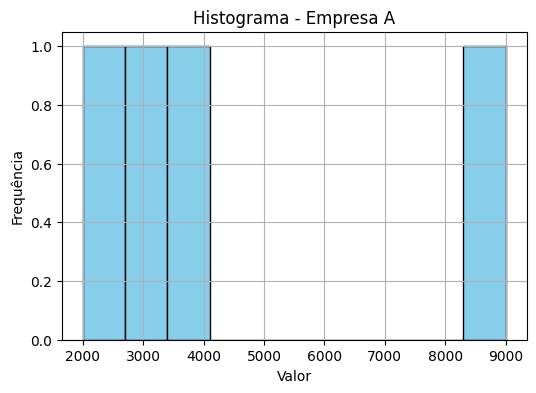

In [17]:
plt.figure(figsize=(6,4))
plt.hist(a, bins=10, color='skyblue', edgecolor='black')
plt.title('Histograma - Empresa A')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()


# Histograma Empresa B


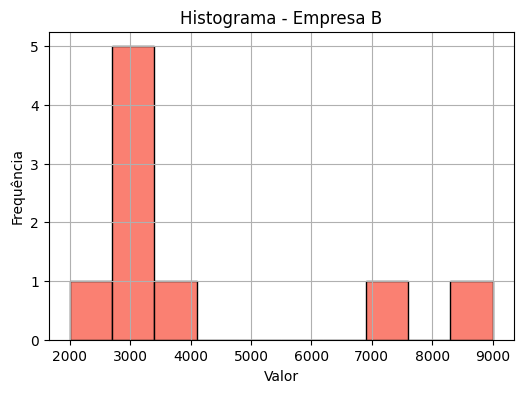

In [18]:
plt.figure(figsize=(6,4))
plt.hist(b, bins=10, color='salmon', edgecolor='black')
plt.title('Histograma - Empresa B')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()


# Histograma Empresa C

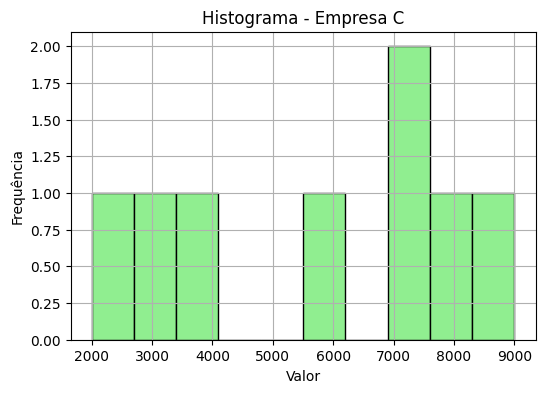

In [19]:
plt.figure(figsize=(6,4))
plt.hist(c, bins=10, color='lightgreen', edgecolor='black')
plt.title('Histograma - Empresa C')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()
